# Metrics Analyses

This notebooks summarize metric's results on evaluation set, do learning, and plotting

In [104]:
import os
import torch
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns

sns.set(font_scale=1.3)
sns.set_style("whitegrid", {
    "grid.linestyle": 'dashed',
    "axes.edgecolor": '#475569',
    'font.family': ['sans-serif'],
    'font.sans-serif': ['Arial',
        # 'Nimbus Sans',
        'Droid Sans',
        'sans-serif'
    ],
})

%matplotlib inline

ROOT_DIR = os.path.dirname(os.getcwd())
root_dir = Path(ROOT_DIR)

## 0. Gini Scores

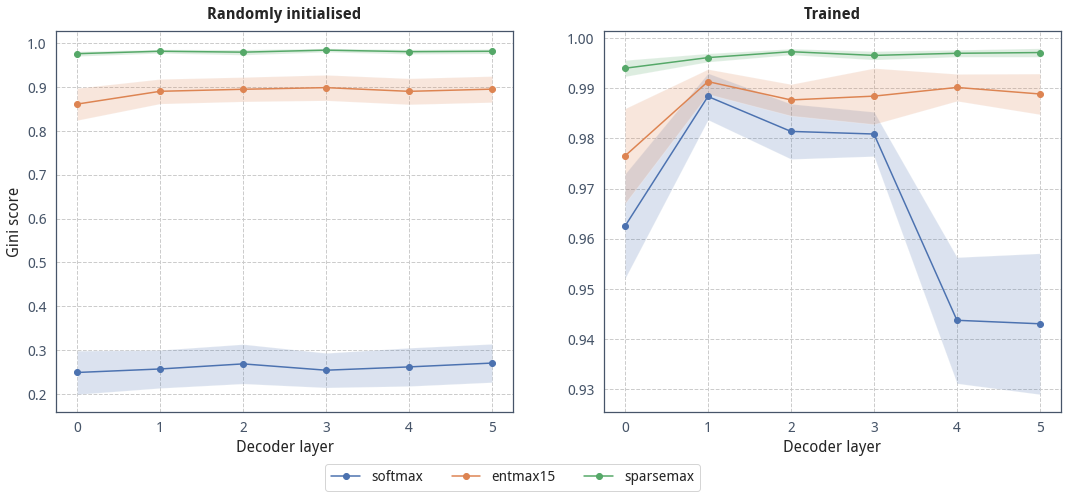

In [127]:
fig, axlist = plt.subplots(1, 2, figsize=(18, 7))

ax1, ax2 = axlist

# Randomly initialise
data = []
filenames = ["softmax-gini-random.pt", "entmax15-gini-random.pt", "sparsemax-gini-random.pt"]
for fn in filenames:
    fpath = root_dir / "outputs" / "metrics" / fn
    in_data = torch.load(fpath)
    item = {
        "decoder_act": in_data['decoder_act'],
        "mean": in_data['mean'],
        "std": in_data['std']
    }
    data.append(item)

for item in data:
    ax1.plot(item['mean'], marker='o', label=item['decoder_act'])
    ax1.fill_between(np.arange(6), item['mean']-item['std'], item['mean']+item['std'], alpha=0.2)

ax1.set_title("Randomly initialised", pad=12, fontweight="bold")
ax1.set_xlabel("Decoder layer")
ax1.set_ylabel("Gini score")
ax1.tick_params(colors='#475569')

# Train models
data = []
filenames = ["softmax-gini.pt", "entmax15-gini.pt", "sparsemax-gini.pt"]
for fn in filenames:
    fpath = root_dir / "outputs" / "metrics" / fn
    in_data = torch.load(fpath)
    item = {
        "decoder_act": in_data['decoder_act'],
        "mean": in_data['mean'],
        "std": in_data['std']
    }
    data.append(item)

for item in data:
    ax2.plot(item['mean'], marker='o', label=item['decoder_act'])
    ax2.fill_between(np.arange(6), item['mean']-item['std'], item['mean']+item['std'], alpha=0.2)

ax2.set_title("Trained", pad=12, fontweight="bold")
ax2.set_xlabel("Decoder layer")
ax2.tick_params(colors='#475569')

# Gather common legends
axlist.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(1.0, -0.12), ncol=3)
fig.savefig("./images/gini-scores.png", bbox_inches='tight')
fig.savefig("./images/gini-scores.pdf", bbox_inches='tight')

## 1. Zero entries ratio

This section presents the results for **zero-entries ratio** metric that we have computed for the baseline softmax, entmax15 and sparsemax models, both randomly initialised and trained.

### 1.1. Softmax

#### Trained model

In [106]:
thresholds = ["1e-03", "1e-04", "1e-05", "1e-06", "1e-07", "1e-08", "1e-09", "1e-10"]

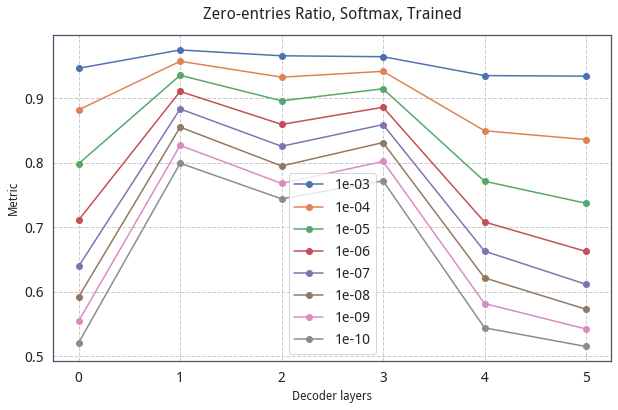

In [107]:
data = []
for th in thresholds:
    fname = root_dir / "outputs" / "metrics" / f"softmax-zeros_ratio-{th}.pt"

    with open(fname, "rb") as f:
        in_data = torch.load(fname)
        item = {
            "metric_threshold": th,
            "mean": in_data['mean'],
            "std": in_data['std']
        }
        data.append(item)

fig, ax = plt.subplots(figsize=(10, 6))

for item in data:
    plt.plot(item['mean'], label=item['metric_threshold'], marker='o')

plt.legend()
plt.xlabel("Decoder layers", fontsize=12)
plt.ylabel("Metric", fontsize=12)

plt.title("Zero-entries Ratio, Softmax, Trained", fontsize=16, pad=16)
fig.savefig("./images/softmax-zeros_entries-trained.png", bbox_inches="tight")

#### Randomly initialised softmax

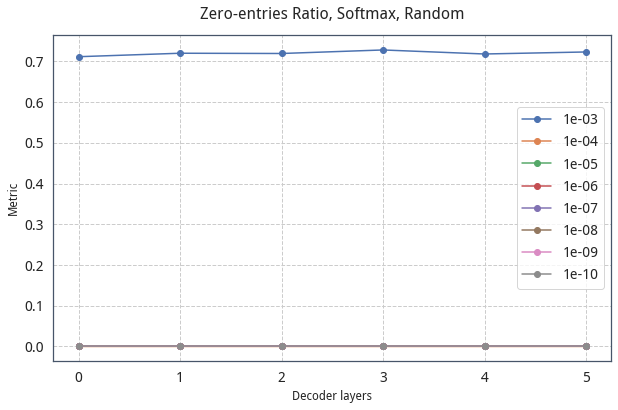

In [108]:
data = []
for th in thresholds:
    fname = root_dir / "outputs" / "metrics" / f"softmax-zeros_ratio-{th}-random.pt"

    with open(fname, "rb") as f:
        in_data = torch.load(fname)
        item = {
            "metric_threshold": th,
            "mean": in_data['mean'],
            "std": in_data['std']
        }
        data.append(item)

fig, ax = plt.subplots(figsize=(10, 6))

for item in data:
    plt.plot(item['mean'], label=item['metric_threshold'], marker='o')

plt.legend()
plt.xlabel("Decoder layers", fontsize=12)
plt.ylabel("Metric", fontsize=12)

plt.title("Zero-entries Ratio, Softmax, Random", fontsize=16, pad=16)
fig.savefig("./images/softmax-zeros_entries-random.png", bbox_inches="tight")

### 1.2. Sparsemax and Entmax15

From quick glances at the results, we could see that these two models are pretty sparse. And since no threshold was used in their evaluation, we'll combine there results in this sections.

In [109]:
filenames = [
    "entmax15-zeros_ratio.pt",
    "entmax15-zeros_ratio-random.pt",
    "sparsemax-zeros_ratio.pt",
    "sparsemax-zeros_ratio-random.pt",
]

In [110]:
data = []

for fn in filenames:
    fpath = root_dir / "outputs" / "metrics" / fn
    in_data = torch.load(fpath)
    item = {
        "decoder_act": in_data['decoder_act'],
        "random": "random" in fn,
        "mean": in_data['mean'],
        "std": in_data['std']
    }
    data.append(item)

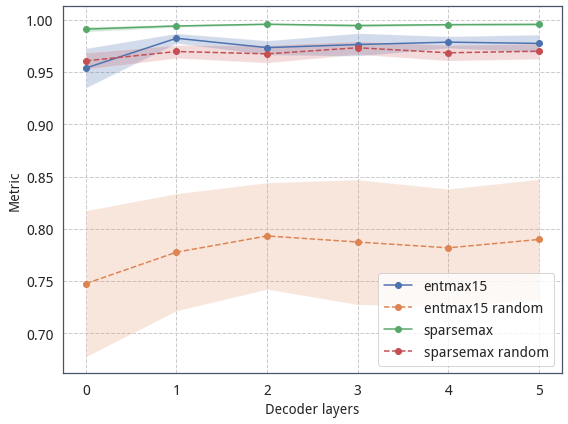

In [111]:
fig, ax = plt.subplots(figsize=(8, 6))

for item in data:
    label = item['decoder_act']
    linestyle = 'solid'
    alpha = 0.25
    if item['random']:
        label += " random"
        linestyle = 'dashed'
        alpha = 0.2
    plt.plot(item['mean'], label=label, marker='o', linestyle=linestyle)
    plt.fill_between(np.arange(6), item['mean']-item['std'], item['mean'] + item['std'], alpha=alpha)

plt.legend()

plt.xlabel("Decoder layers", fontsize=14)
plt.ylabel("Metric", fontsize=14)

# plt.title("Zero-entries Ratio, Sparsemax & Entmax15", fontsize=16, pad=16)
plt.tight_layout()
fig.savefig("./images/sparsemax-entmax15-zeros_entries.png", bbox_inches="tight")